In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

# Scenario 1

##  The insurance company wants Fawn and her associates to run surveillance to determine if the rate of fraud is higher than what the industry normally reports. Specifically, they want to know if the incidence of fraud among claimants is more than 16%

### one proportion z test

In [2]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

2.9229268377264077 0.0034675798365736213


#### There is more than 16% of fradulant claims since p value < 0.05

# Scenario 2

## Medical researchers are trying to understand if four topical antiseptics are being used in the same ratio at three different clinics in town.

### Independent Chi-Square

In [4]:
antiseptics2 = pd.read_csv("C:/Users/georg/Downloads/antiseptics/antiseptics.csv")
antiseptics2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [6]:
antiseptics2_pivot = pd.pivot_table(antiseptics2,index='AS',columns='Clinic',values="Count")
antiseptics2_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [7]:
stats.chi2_contingency(antiseptics2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

#### There is no difference in use of the four types of antiseptics between the three clinics in town since p value > 0.05.

# Scenario 3

## A financial institution is interested in the savings practices of different demographic groups. They are going to use the results to do some targeted marketing.

### One-Way ANOVA

In [8]:
savings1 = pd.read_csv("C:/Users/georg/Downloads/savings/savings.csv")
savings1.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [21]:
savings1_expanded=pd.melt(savings1,var_name='Group', value_name='Amount')
savings1_expanded

,Group,Amount
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18
...,...,...
227,Group D,12180.86
228,Group D,12972.11
229,Group D,12068.83
230,Group D,16064.42


In [23]:
savings1_expanded = savings1_expanded.replace(savings1.columns, [0,1,2,3])
savings1_expanded.head()

,Group,Amount
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


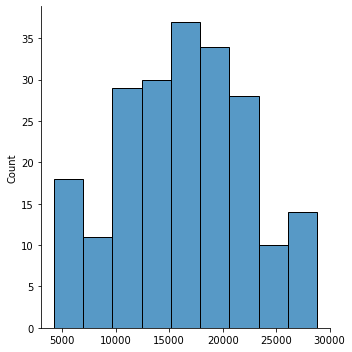

In [24]:
sns.displot(savings1.values[~np.isnan(savings1.values)])

In [29]:
scipy.stats.bartlett(savings1_expanded['Amount'], savings1_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

#### does not meet assumption, continuing for analysis

In [31]:
savings1_expanded.dropna(inplace=True)

In [40]:
savings1_data = savings1_expanded['Amount'][savings1_expanded['Group']==0], savings1_expanded['Amount'][savings1_expanded['Group']==1], savings1_expanded['Amount'][savings1_expanded['Group']==2], savings1_expanded['Amount'][savings1_expanded['Group']==3], savings1_expanded['Amount'][savings1_expanded['Group']==4]

In [42]:
stats.f_oneway(savings1_expanded['Amount'][savings1_expanded['Group']==0], 
               savings1_expanded['Amount'][savings1_expanded['Group']==1], 
               savings1_expanded['Amount'][savings1_expanded['Group']==2], 
               savings1_expanded['Amount'][savings1_expanded['Group']==3])

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

#### These demographic groups are significantly different in their savings practices since p value is < 0.05.

# Scenario 4

## The local school board conducted a poll to gauge public sentiment about a school bond. They asked respondents if they favored or opposed a bond in the upcoming election. The respondents were asked some demographic questions, too.

## Complete a report for grading. The counts for the different groups are as follows:

 ### With school age children and favorable - 374
 ### With school age children and unfavorable - 129
 ### Without school age children and favorable - 171
 ### Without school age children and unfavorable - 74


### Two proportion z test

In [47]:
count = np.array([374, 171])
nobs = np.array([374 + 129, 171 +74])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

1.3156546893290748 0.18828996870412507


#### There is not a significant difference between parents with school aged children and without when favoring bond